In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [37]:
import os

In [38]:
files=os.listdir(r"C:\Users\Gargi\Downloads\New folder\uber-pickups-in-new-york-city")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [39]:
#Removing the file to use it for later analysis
files.remove("uber-raw-data-janjune-15.csv")
files


['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [40]:
path=r'C:\Users\Gargi\Downloads\New folder\uber-pickups-in-new-york-city'

#blank dataframe
final=pd.DataFrame()
#Concatenating all the csv files to form a single data frame.
for file in files:
    df=pd.read_csv(path+"/"+file,encoding='utf-8')
    final=pd.concat([df,final])

In [41]:
final.shape

(4534327, 4)

In [42]:
#Data preparation

df=final.copy()
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [43]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [44]:
# Since the format is different of Date/Time column so using datetime function of panda library 
df['Date/Time']=pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

KeyboardInterrupt: 

In [10]:
df.dtypes


Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [11]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [12]:
#Splitting the columns of the data frame.
df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [13]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [14]:
import plotly.express as px

In [15]:
#Analysis for week days
px.bar(df['weekday'].value_counts().index,y=df['weekday'].value_counts())

In [16]:
df['weekday'].value_counts()
# we can conclude that rush is more on thursday.

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

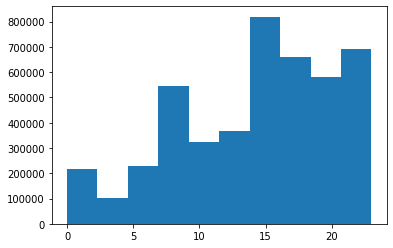

In [17]:
plt.hist(df['hour'])

In [18]:
df['month'].unique()
#It peaks during evening time when people are logging off from work

array([9, 5, 6, 7, 8, 4], dtype=int64)

In [19]:
for i,month in enumerate(df['month'].unique()):
    print(i)
    print(month)

0
9
1
5
2
6
3
7
4
8
5
4


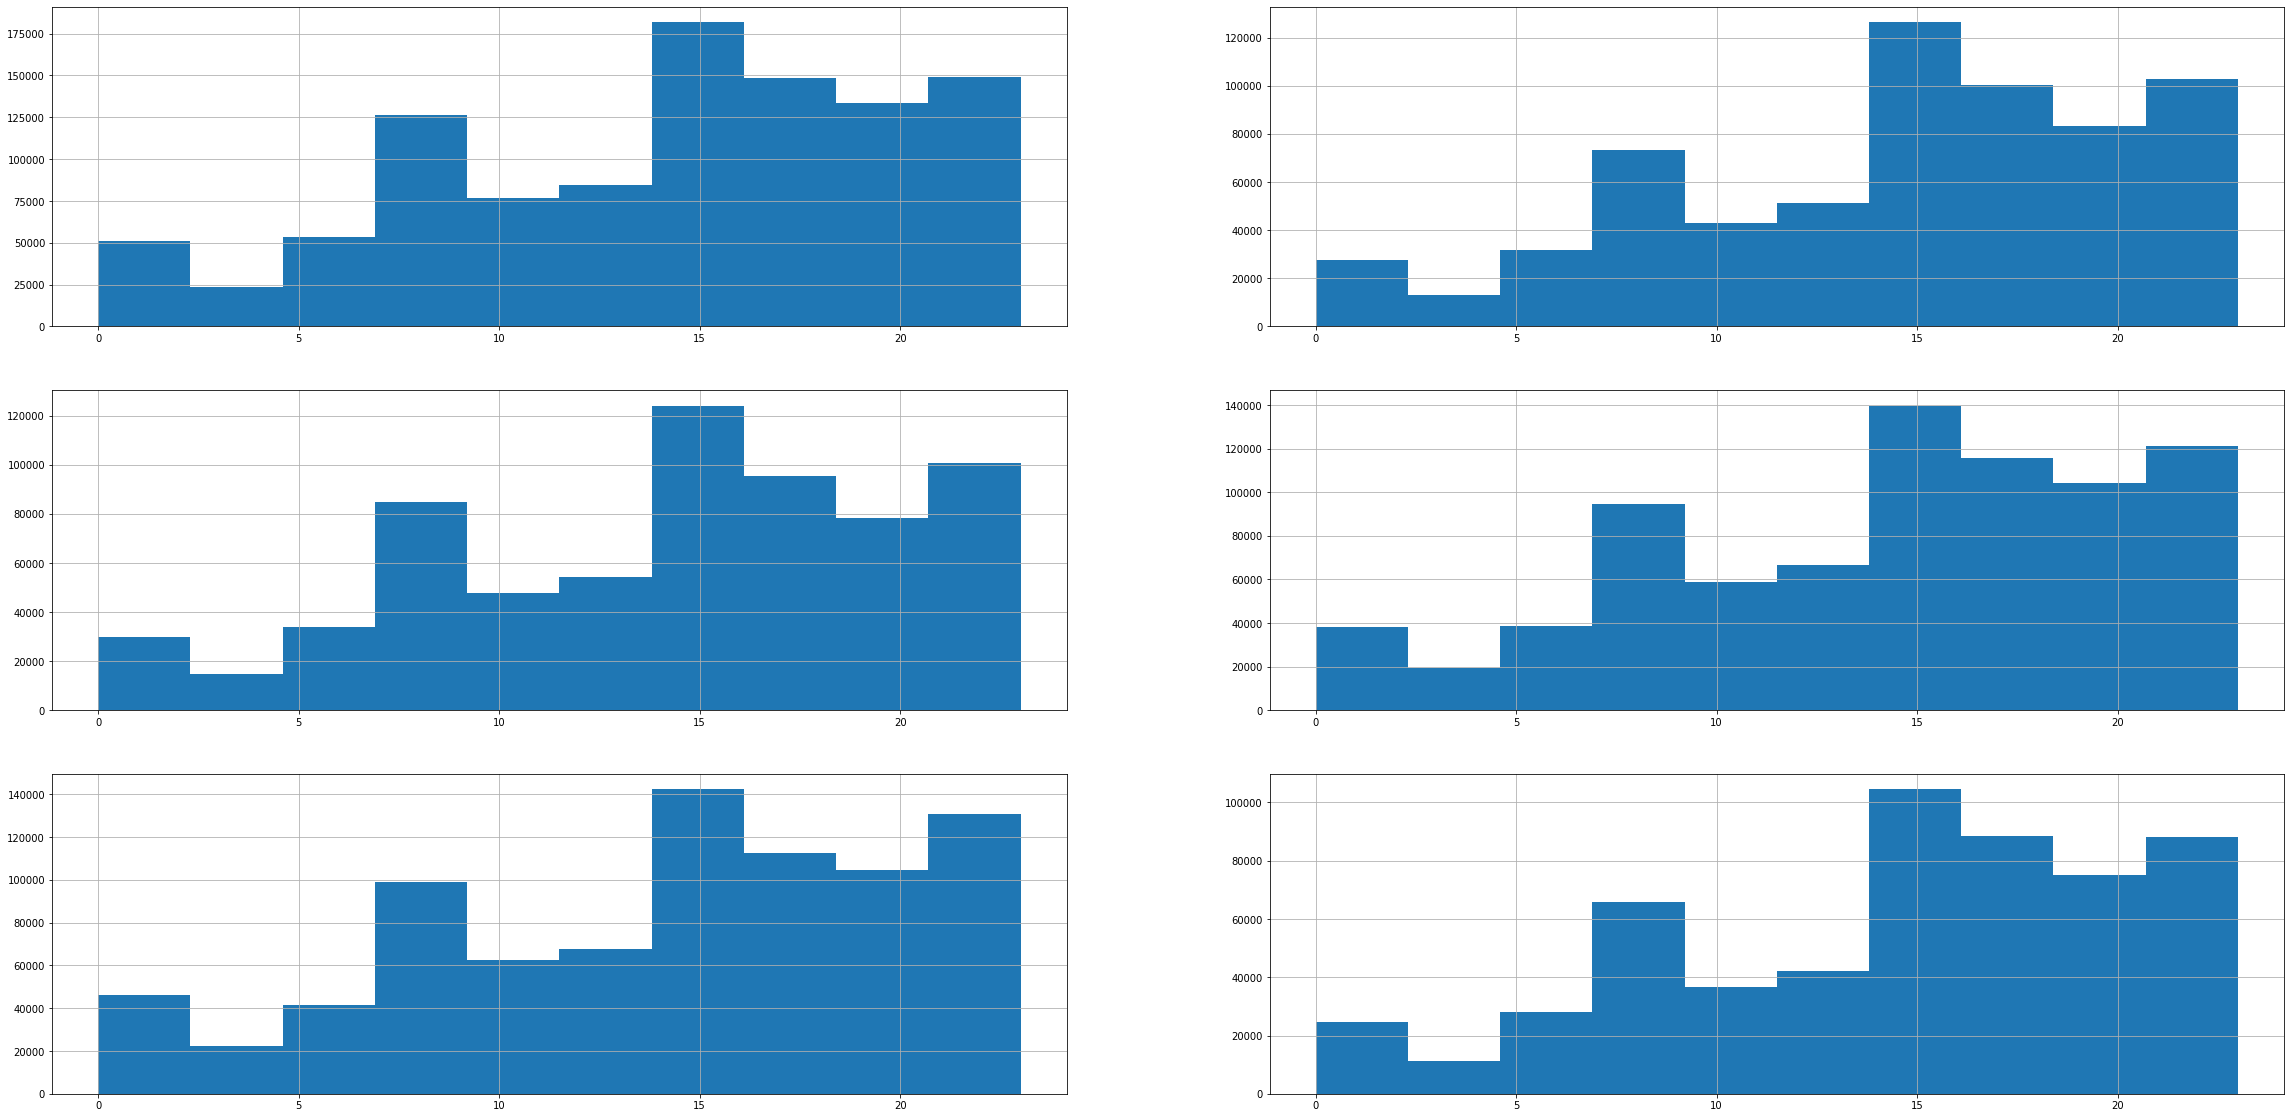

In [20]:
plt.figure(figsize=(40,20))

for i,month in enumerate(df['month'].unique()):
  plt.subplot(3,2,i+1)
  df[df['month']==month]['hour'].hist()


In [21]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [22]:
trace1 = go.Bar( 
        x = df.groupby('month')['hour'].sum().index,
        y = df.groupby('month')['hour'].sum(),
        name= 'Priority')
iplot([trace1])

Text(0.5, 1.0, 'Journeys by Month Day')

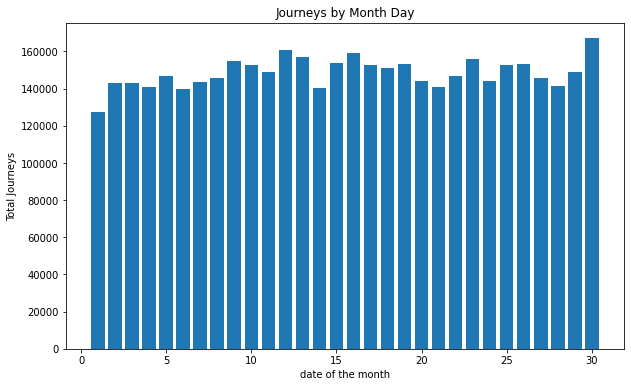

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df['day'], bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day')

C:\Users\Gargi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='day', ylabel='Density'>

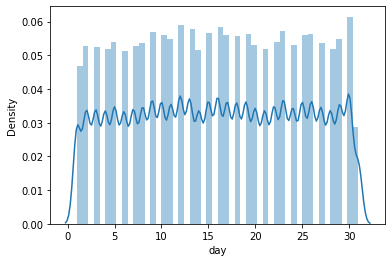

In [24]:
sns.distplot(df['day'])

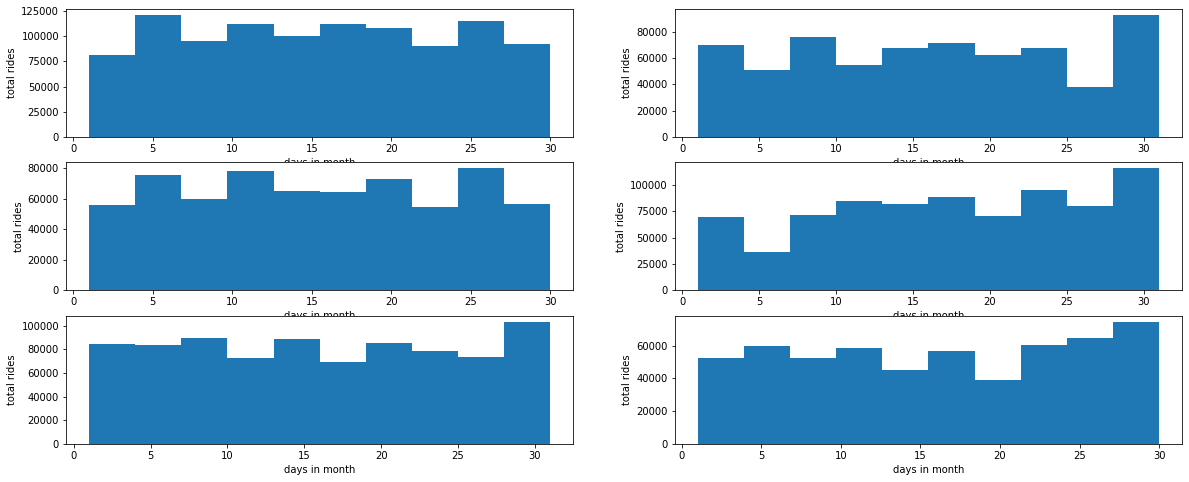

In [25]:
#Analysing demands of user
plt.figure(figsize=(20,8))
for i,month in enumerate(df['month'].unique(),1):
    plt.subplot(3,2,i)
    df_out=df[df['month']==month]
    plt.hist(df_out['day'])
    plt.xlabel('days in month'.format(i))
    plt.ylabel('total rides')

<AxesSubplot:xlabel='hour', ylabel='Lat'>

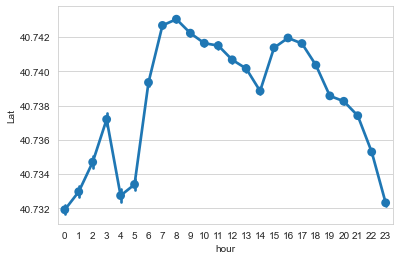

In [26]:
sns.set_style(style='whitegrid')
sns.pointplot(x="hour",y="Lat",data=df)

Text(0.5, 1.0, 'hoursoffday vs latiitide of passenger')

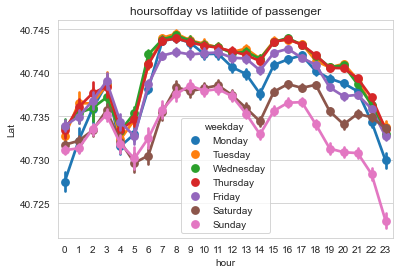

In [27]:
ax=sns.pointplot(x="hour",y="Lat", hue="weekday",data=df)
ax.set_title('hoursoffday vs latiitide of passenger')

In [28]:
#to analyse which base number gets popular by month name
df.head()
df['Base'].head()

0    B02512
1    B02512
2    B02512
3    B02512
4    B02512
Name: Base, dtype: object

In [29]:

base=df.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


<AxesSubplot:xlabel='month', ylabel='Date/Time'>

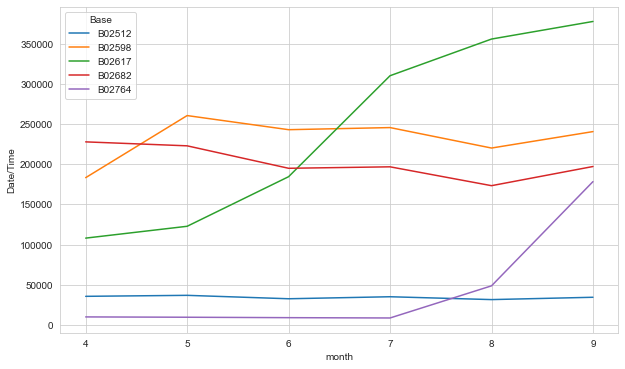

In [30]:
#to analyse which base number gets popular by month name
plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='Date/Time',hue='Base',data=base)
#Base B02617 get more popular amoung all other bases

In [31]:
#simplest way of creating pivot tables,first of all call groupby on 2 columns so that we will get group df.groupby(['weekday','hour'].apply(lambda x: len(x)), now "weekday" becomes rows and "hour" becomes cols & then call unstack
def count_rows(rows):
    return len(rows)
    

In [34]:
pivot=by_cross.unstack()
pivot

NameError: name 'by_cross' is not defined

In [45]:
#creating heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=False)

NameError: name 'pivot' is not defined

In [46]:
def heatmap(col1,col2):
    by_cross = df.groupby([col1,col2]).apply(lambda x:len(x))
    pivot=by_cross.unstack()
    plt.figure(figsize=(10,6))
    return sns.heatmap(pivot,annot=False)

In [47]:
## validating above Analysis through Heatmap
heatmap('day','hour')

KeyError: 'day'

In [ ]:
heatmap('day','month')

In [ ]:
#We observe that the number of trips increases each month, we can say that from April to September 2014, Uber was in a continuous improvement process.

In [49]:
#Analysis of Jan-June uber_15
uber_15 = pd.read_csv(r'C:\Users\Gargi\Downloads\New folder\uber-pickups-in-new-york-city\uber-raw-data-janjune-15.csv',encoding='utf-8')
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [50]:
#Checking the minimum date in the uber_15
uber_15['Pickup_date'].min()

'2015-01-01 00:00:05'

In [51]:
#Checking the maximum date in the uber_15
uber_15['Pickup_date'].max()

'2015-06-30 23:59:00'

In [52]:
uber_15['Pickup_date'] =  pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [53]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['hour']=uber_15['Pickup_date'].dt.hour

In [54]:
#Uber pickups by the month in NYC
px.bar(x=uber_15['month'].value_counts().index,
           y=uber_15['month'].value_counts().values)

In [ ]:
#We can see that the number of Uber pickup has been steadily increasing throughout the first half of 2015 in NYC

In [55]:
#Analysing Rush in New york City
ax=sns.countplot(uber_15['hour'])
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.0f'))
#Interestingly, after the morning rush, the number of Uber pickups doesn't dip much throughout the rest of the morning and early afternoon. There is significantly more demand in the evening than the daytime. Let's investigate to see if there's a difference in hourly pattern for different days of the week.


C:\Users\Gargi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



NameError: name 'tick' is not defined

In [ ]:
#Analysing In-Depth Analysis of Rush in New york City Day & hour wise